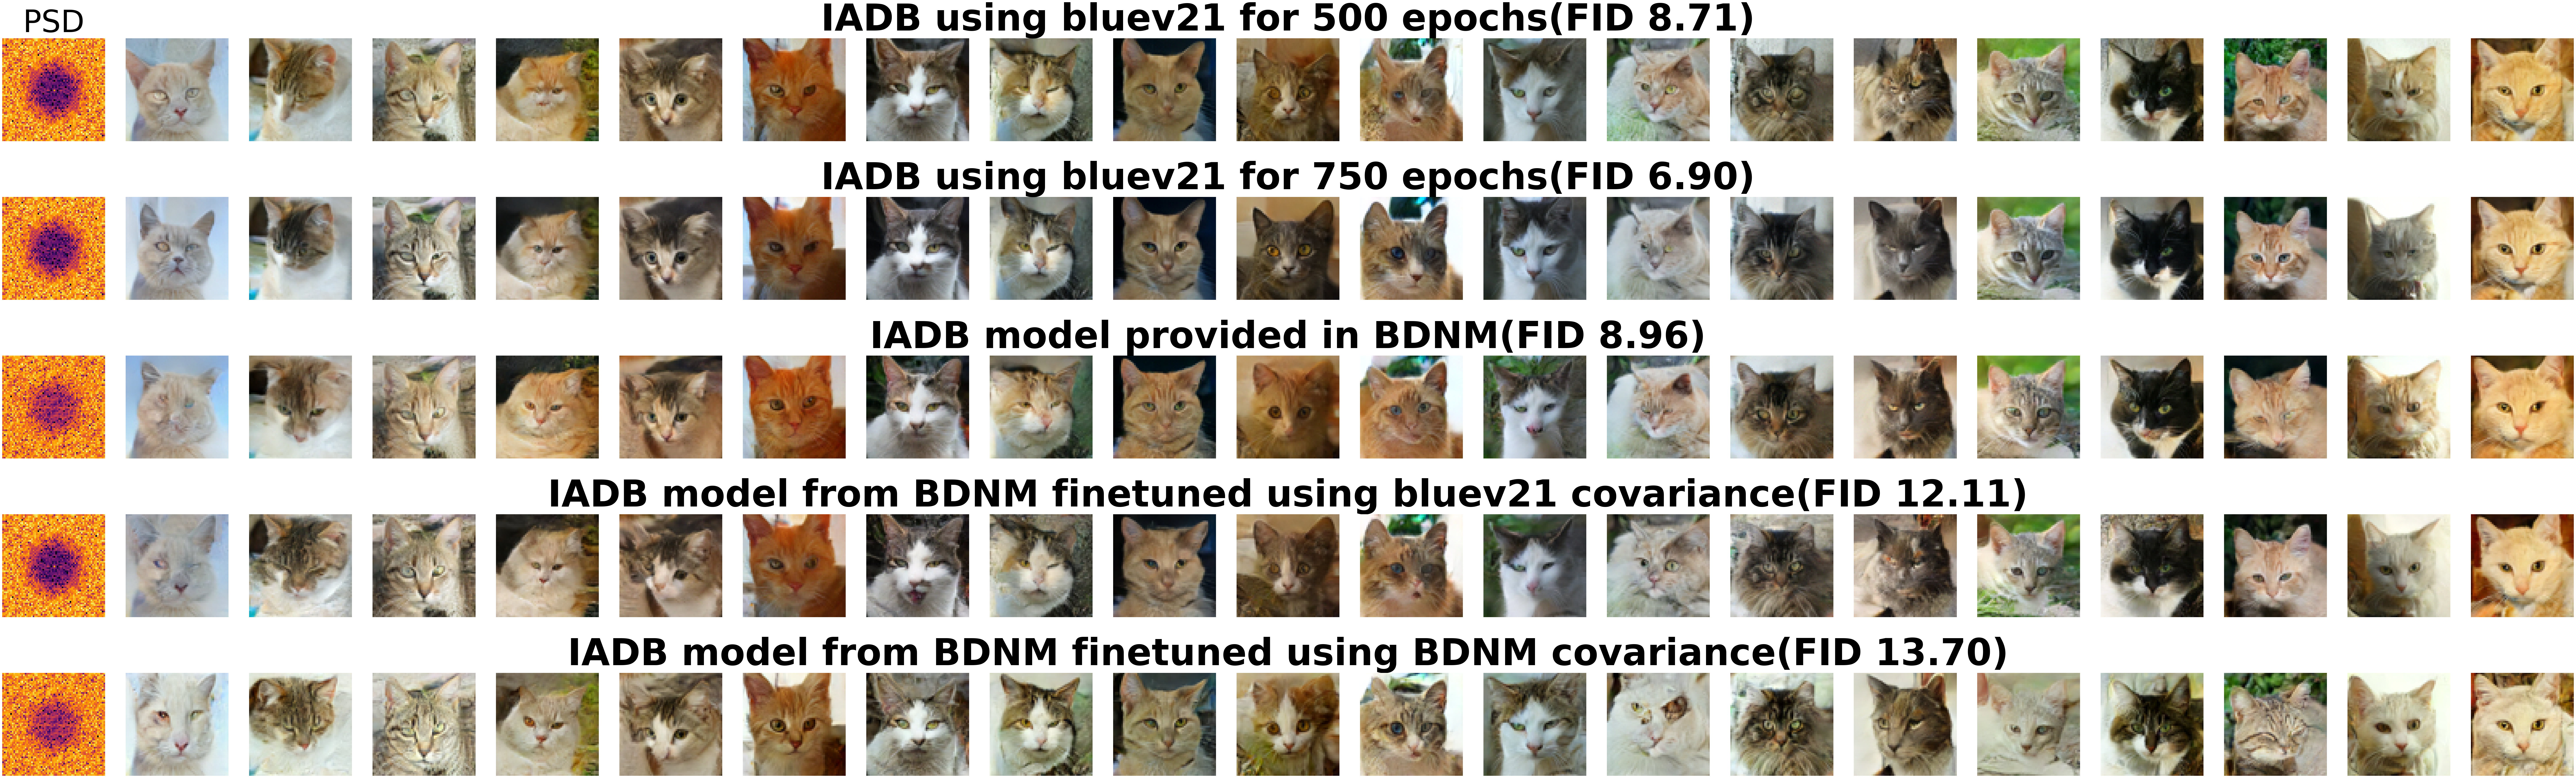

In [30]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
#noises = ["untrained","purplev3","purplev2","purplev1","greenv2","greenv1","red","bluev25","bluev24","bluev23","bluev22","bluev21","bluev15","bluev14",'white',"baseline"] #,"bluev18","bluev17","bluev16"
#noises = ["red","bluev22","bluev21",'white',"baseline"] 
noises = ['model_bluev21_500','model_bluev21_750',"untrained",'model_bluev21_base',"baseline"]
names = ['IADB using bluev21 for 500 epochs(FID 8.71)','IADB using bluev21 for 750 epochs(FID 6.90)','IADB model provided in BDNM(FID 8.96)','IADB model from BDNM finetuned using bluev21 covariance(FID 12.11)',"IADB model from BDNM finetuned using BDNM covariance(FID 13.70)"]
num_cats = 20
cat_start = 10
fig, axs = plt.subplots(len(noises), num_cats+1, figsize=(150, 45))

basedir = "results_gaussianBN/cat_res64_gaussianBN_sigmoid_1000.0_0_3_outc6_seed0"
epislon = np.random.normal(size=(4096,1))
for i in range(num_cats+1):
    
    if(i != 0):
        for j in range(len(noises)):
            noise = noises[j] if noises[j].split('_')[0] != 'model' else noises[j].split('_')[1]
            arraynum = np.array([i+cat_start])
            img_path = None
            if(noises[j].split('_')[0] == 'model'):
                img_path = basedir + f"/{noise}/images/{noises[j]}/{np.char.zfill(arraynum.astype(str), 5)[0]}.png"
            else:
                img_path = basedir + f"/{noise}/images/{np.char.zfill(arraynum.astype(str), 5)[0]}.png"
            axs[j,i].imshow(Image.open(img_path))
            #axs[j,i].set_title(noises[j])
            axs[j,i].axis('off')
            if(i == ((num_cats+1) // 2)):
                axs[j,i].set_title(names[j] if len(names) == len(noises) else noises[j],fontsize=120,fontweight='bold')
    else:
        for j in range(len(noises)):
            noise = noises[j] if noises[j].split('_')[0] != 'model' else noises[j].split('_')[1]
            arraynum = np.array([i+1])
            covariance_path = f"covariances/L_cov_{noises[j]}.npy"
            cov_mat_L = None
            if(noises[j] != 'baseline' and noises[j] != 'untrained'):
                
                cov_mat_L = np.load(f'covariances/L_cov_{noise}.npy'.format(64, 3)).astype(np.float32)
            else:
                cov_mat_L = np.load(f'covariances/L_cov_baseline.npz'.format(64, 3))['x'].astype(np.float32)
            
            blue = cov_mat_L @ epislon

            F = np.fft.fftshift(np.fft.fft2(blue.reshape(64,64)))
            power_spectrum = np.log(np.abs(F)**2 + 1)
            axs[j,i].imshow(power_spectrum,cmap='inferno', interpolation='nearest')
            if(j == 0):
                axs[j,i].set_title("PSD",fontsize=100)
            axs[j,i].axis('off')


